Exploratory Data Analysis

1️⃣ Setup and Library Imports

In [1]:
# Install seaborn for visualizations (if not already installed)
!pip install seaborn

# Import required libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For statistical visualizations
import os  # For file handling

# Import statistical tests
from scipy.stats import chi2_contingency, f_oneway


2️⃣ Google Drive Integration

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3️⃣ Load Dataset

In [3]:
# Define dataset location (modify path based on actual location)
DATASET_LOC = "/content/drive/MyDrive/EAFIT/SEGUNDO SEMESTRE/APRENDIZAJE AUTOMÁTICO/COMPETITION 1"
prepared_data_file = "train_file.csv"

# Load dataset into a Pandas DataFrame
df = pd.read_csv(os.path.join(DATASET_LOC, prepared_data_file))

# Display first few rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001800,1,1,1,1,0,2510.0,1983.0,140.0,180.0,1.0,2,0
1,LP002911,1,1,1,0,0,2787.0,1917.0,146.0,360.0,0.0,0,0
2,LP002364,1,1,0,0,0,14880.0,0.0,96.0,360.0,1.0,1,1
3,LP001924,1,0,0,0,0,3158.0,3053.0,89.0,360.0,1.0,0,1
4,LP002788,1,1,0,1,0,2454.0,2333.0,181.0,360.0,0.0,2,0


4️⃣ Basic Data Exploration

In [4]:
# Display dataset information (column types, non-null counts)
df.info()

# Summary statistics for numerical features
df.describe()

# Check for missing values in each column
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            393 non-null    object 
 1   Gender             393 non-null    int64  
 2   Married            393 non-null    int64  
 3   Dependents         393 non-null    int64  
 4   Education          393 non-null    int64  
 5   Self_Employed      393 non-null    int64  
 6   ApplicantIncome    393 non-null    float64
 7   CoapplicantIncome  393 non-null    float64
 8   LoanAmount         393 non-null    float64
 9   Loan_Amount_Term   393 non-null    float64
 10  Credit_History     393 non-null    float64
 11  Property_Area      393 non-null    int64  
 12  Loan_Status        393 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 40.0+ KB


,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


5️⃣ Handling Missing Values

In [8]:
# Fill missing numerical values with the median
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# Calculate medians only for numerical columns
num_medians = df[num_cols].median()

# Fill missing numerical values
df[num_cols] = df[num_cols].fillna(num_medians)

# Fill missing categorical values with the mode
for col in df.select_dtypes(include=["object"]).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-8-434e3d641321>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


6️⃣ Univariate Analysis (Distribution of Features)

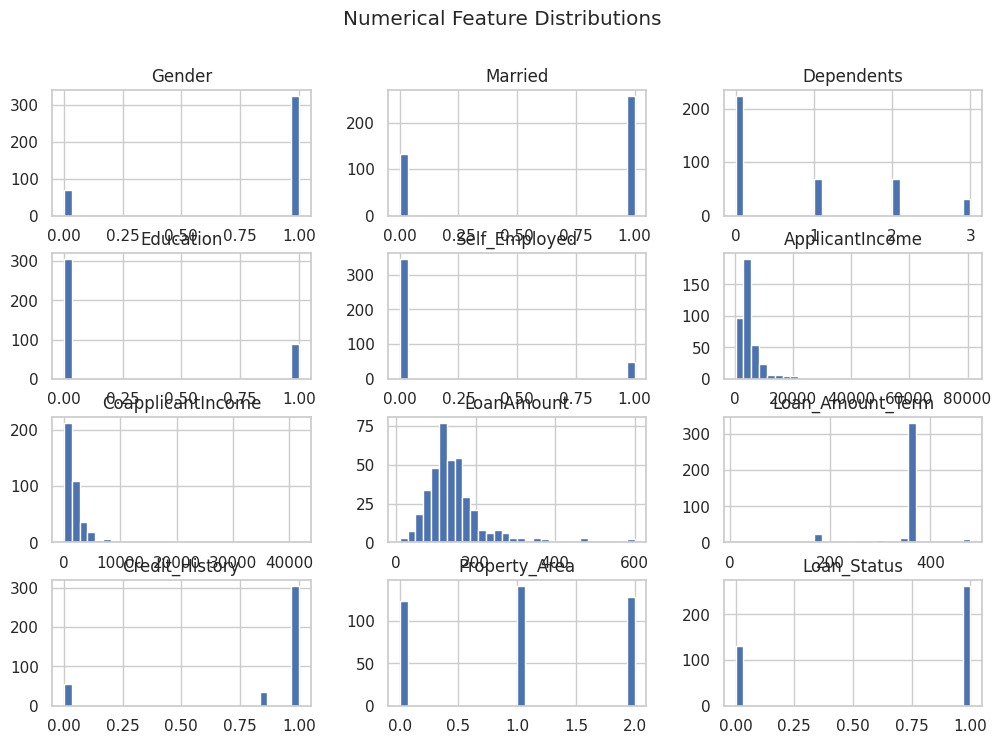

<ipython-input-9-2ba549815a07>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="coolwarm")


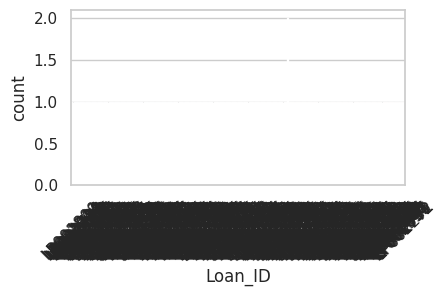

In [9]:
# Set visualization style
sns.set(style="whitegrid")

# Visualize numerical distributions
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Countplot for categorical variables
categorical_columns = df.select_dtypes(include=["object"]).columns

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, palette="coolwarm")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


7️⃣ Bivariate Analysis (Feature Relationships)

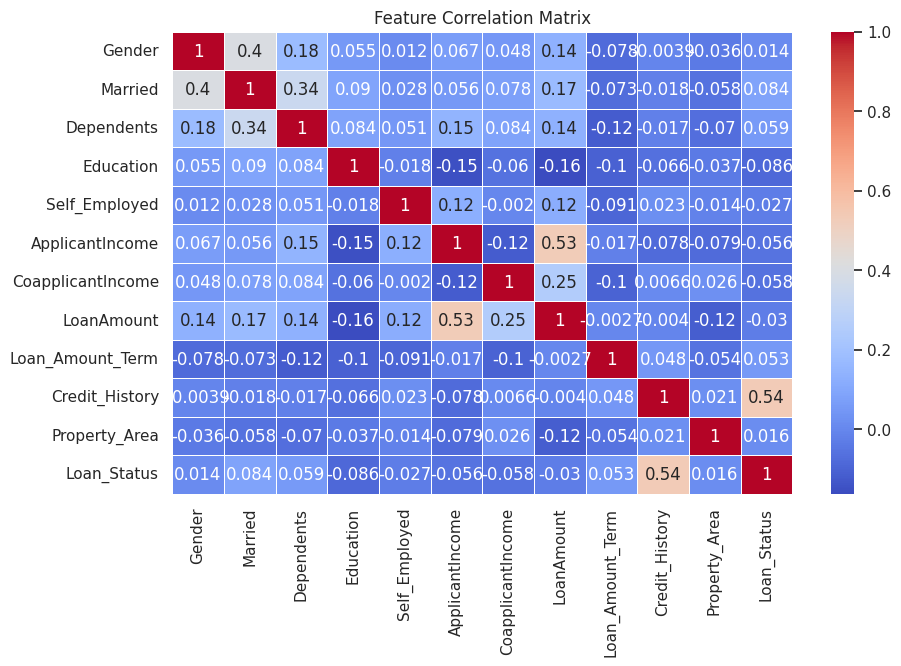

In [15]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

8️⃣ Chi-Square Test for Categorical Variables

In [13]:
# Function to perform chi-square test
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p < 0.05  # Returns True if there is a significant relationship

9️⃣ ANOVA Test for Numerical Variables

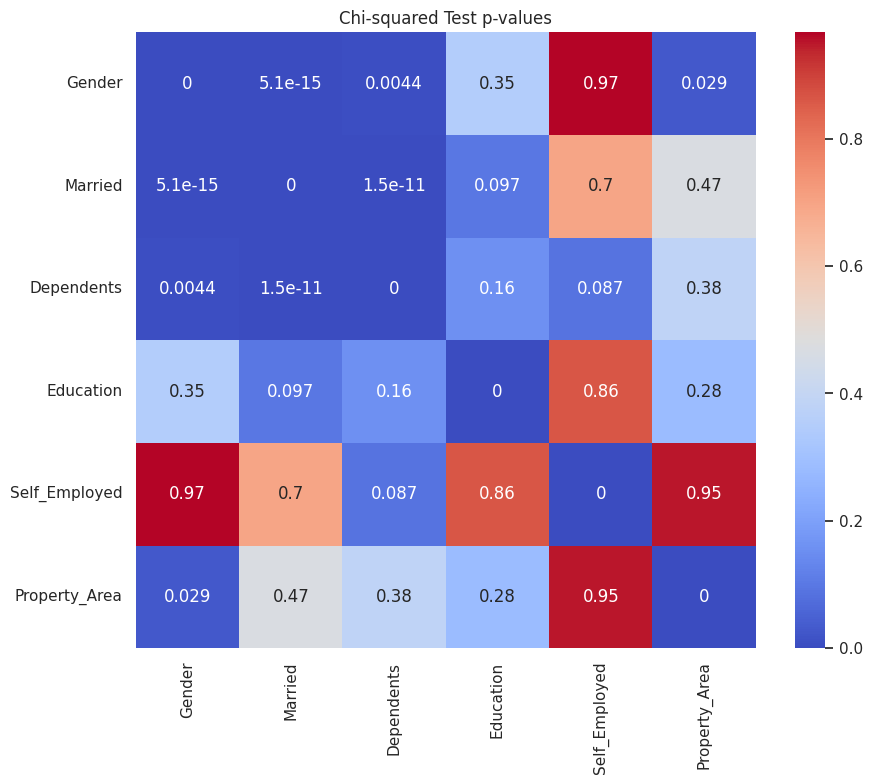

In [16]:
# 2. Chi-squared test among categorical features
chi2_results = np.zeros((len(cat_cols), len(cat_cols)))
for i, feature1 in enumerate(cat_cols):
    for j, feature2 in enumerate(cat_cols):
        if i != j:
            contingency_table = pd.crosstab(df[feature1], df[feature2])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi2_results[i, j] = p

# Plot the chi-squared results
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_results, annot=True, cmap='coolwarm', xticklabels=cat_cols, yticklabels=cat_cols)
plt.title('Chi-squared Test p-values')
plt.show()


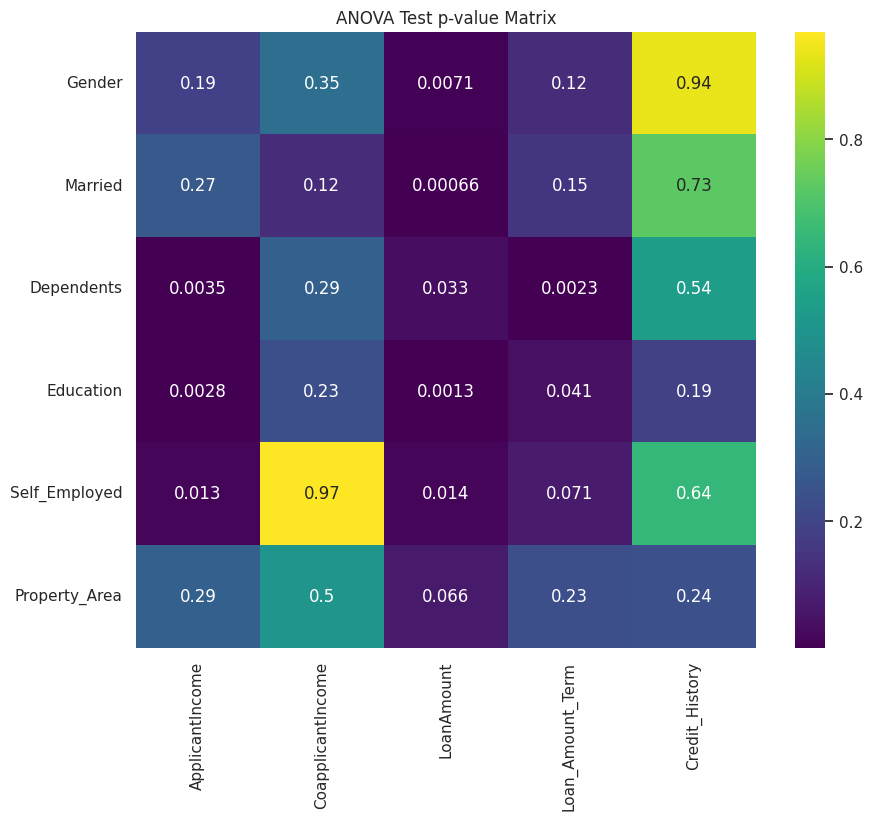

In [17]:
# 3. ANOVA between categorical and numerical features
anova_p_values = np.zeros((len(cat_cols), len(num_cols)))
for i, cat_feature in enumerate(cat_cols):
    for j, num_feature in enumerate(num_cols):
        try:
            groups = [df[num_feature][df[cat_feature] == category] for category in df[cat_feature].unique()]
            f_val, p_val = f_oneway(*groups)
            anova_p_values[i, j] = p_val
        except:
            anova_p_values[i, j] = 1

# Plot the ANOVA test p-value matrix
plt.figure(figsize=(10, 8))
sns.heatmap(anova_p_values, annot=True, cmap='viridis', xticklabels=num_cols, yticklabels=cat_cols)
plt.title('ANOVA Test p-value Matrix')
plt.show()